# `Regularization, method to prevent Overfitting`

## `Manhattan vs Euclidean Distance`
- **Blue is Manhattan, L1(Lasso) uses Manhattan Distance, Lasso ( Least absolute and shrinkage selection operator )**
- **Green is Euclidean, L2(Ridge) uses Euclidean Distance, Ridge ( Squared magnitude of coefficients )**
###### `Milan Sir Advice : Ridge is always a better choice then Lasso`
![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/1200px-Manhattan_distance.svg.png)
![](https://miro.medium.com/max/761/1*nrWncnoJ4V_BkzEf1pd4MA.png)

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [316]:
boston_data = load_boston()
print(boston_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### `target variable data`

In [317]:
print(boston_data["target"])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [318]:
data = pd.DataFrame(boston_data["data"],columns=boston_data["feature_names"])

In [319]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [320]:
data["MEDV"] = boston_data["target"]

In [321]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [322]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [323]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [324]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [325]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [326]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [327]:
y_pred = linear_model.predict(X_test)
y_pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

## `L1, L2 and Elastic Net do changes in coeff, so observe coeff`

### `coefficients`

In [328]:
linear_model.coef_

array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
       -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
        2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
       -5.17639519e-01])

In [329]:
lm_coeff = pd.DataFrame(linear_model.coef_,columns=["coeff"])
lm_coeff["Feature_name"] = X.columns

### `Features vs coefficients`

In [330]:
lm_coeff

,coeff,Feature_name
0,-0.128323,CRIM
1,0.029552,ZN
2,0.048859,INDUS
3,2.773503,CHAS
4,-16.238829,NOX
5,4.368755,RM
6,-0.009248,AGE
7,-1.400867,DIS
8,0.257761,RAD
9,-0.009957,TAX


### `Plotting the Features vs coefficients `

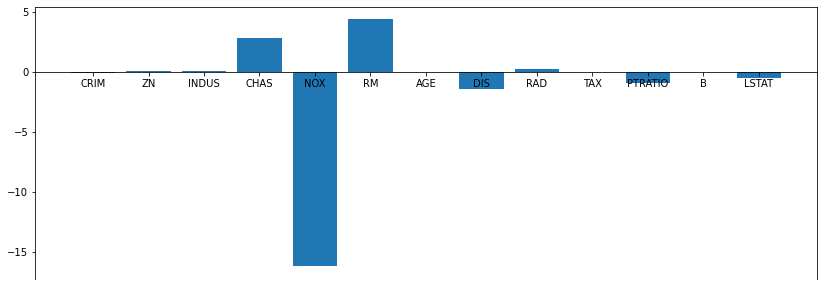

In [331]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(lm_coeff["Feature_name"], lm_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()

### `Evaluation`

In [332]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.700924890603766
RSquared is: 68.44%


----------

## 1. `Lasso Regression -------------------------------------`
- [Cllick Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [333]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)
lasso_r.fit(X_train,y_train)

Lasso(alpha=1)

In [334]:
y_pred = lasso_r.predict(X_test)

In [335]:
y_pred

array([28.44649035, 32.26420703, 14.19133467, 25.80922014, 19.00053539,
       22.17882145, 18.18745473, 12.2076168 , 22.00002099, 21.17824273,
       21.36763502, 20.46372306, -5.12945561, 21.14175682, 21.88240241,
       23.79826473, 20.3076515 ,  6.33629668, 36.76203846, 18.11663962,
       27.6136195 , 29.01471176, 12.35009529, 24.42518653, 19.13270363,
       16.37066632, 23.22537672, 13.62406739, 19.4568262 , 20.63637289,
       22.96163419, 26.3207951 , 23.09187069, 23.20136607, 14.82401884,
       21.39458648, 30.88030255, 23.30089985, 20.80057571, 24.36161178,
       14.76085524, 30.63071476, 37.87212148, 19.19099595, 26.90751472,
       18.50157914, 15.80575597, 25.34187097, 19.25342381, 31.26048219,
       23.67313163, 33.11651599, 16.50227242, 25.7350757 , 37.30207558,
       22.7716227 , 19.79620849, 31.93517454, 25.05156629, 15.54165631,
       24.20646291, 30.83774675, 31.11317138, 18.8756895 , 24.6370459 ,
       14.22359731, 19.630128  , 26.67641872, 30.72770352, 12.55

In [336]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.938699483705722
RSquared is: 65.17%


In [337]:
lassor_coeff = pd.DataFrame(lasso_r.coef_,columns=["coeff"])
lassor_coeff["Feature_name"] = X.columns
lassor_coeff

,coeff,Feature_name
0,-0.083898,CRIM
1,0.026461,ZN
2,-0.000000,INDUS
3,0.000000,CHAS
4,-0.000000,NOX
5,1.545450,RM
6,0.013458,AGE
7,-0.582829,DIS
8,0.207381,RAD
9,-0.011213,TAX


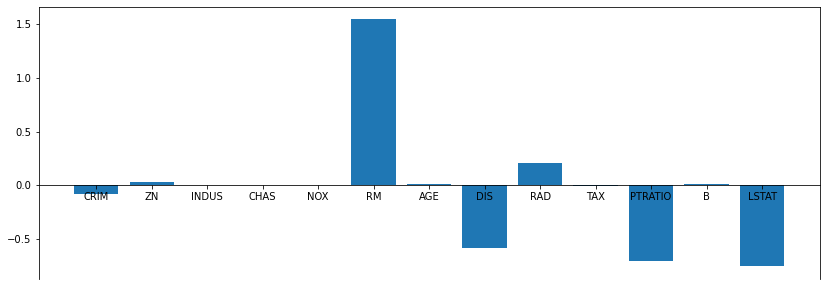

In [338]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(lassor_coeff["Feature_name"], lassor_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()

------------

## 2. `Ridge Regression - L2 ----------------------------------`
[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [339]:
from sklearn.linear_model import Ridge
lm_r = Ridge(alpha=3)
lm_r.fit(X_train,y_train)

Ridge(alpha=3)

In [340]:
y_pred = lm_r.predict(X_test)

In [341]:
y_pred

array([28.40434233, 35.45353692, 14.01443394, 24.9563889 , 19.38869988,
       21.8699979 , 17.49691914, 14.05325267, 21.72088857, 20.85337812,
       23.56632248, 18.46232929, -7.29917602, 20.84095919, 19.22412003,
       26.02507101, 19.9733807 ,  5.51013633, 40.27605515, 18.08240051,
       27.68908296, 29.8862059 , 11.23009927, 24.8194323 , 18.38611263,
       14.78717379, 22.13780435, 14.56391728, 21.01778648, 19.6468928 ,
       21.64713276, 25.53942576, 25.65467742, 19.320782  , 15.56956356,
       19.19283045, 31.16139367, 21.12544116, 22.89965056, 24.45728799,
       14.10893572, 31.88040444, 42.25085596, 17.03018091, 27.00753604,
       17.35493369, 14.01835992, 25.74675381, 19.54578609, 30.44638838,
       21.23351506, 34.06822866, 16.06233826, 26.2781895 , 39.91852891,
       22.66894003, 19.67202641, 32.83922276, 24.89590347, 12.55846882,
       23.32358562, 31.24660679, 31.87907479, 16.75682324, 21.21054772,
       15.03593534, 20.62996317, 26.01509074, 31.03897645, 11.79

In [342]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.77493811091785
RSquared is: 67.44%


In [343]:
ridger_coeff = pd.DataFrame(lm_r.coef_,columns=["coeff"])
ridger_coeff["Feature_name"] = X.columns
ridger_coeff

,coeff,Feature_name
0,-0.121692,CRIM
1,0.032649,ZN
2,-0.000014,INDUS
3,2.300422,CHAS
4,-4.558834,NOX
5,4.329299,RM
6,-0.018299,AGE
7,-1.229492,DIS
8,0.238877,RAD
9,-0.011404,TAX


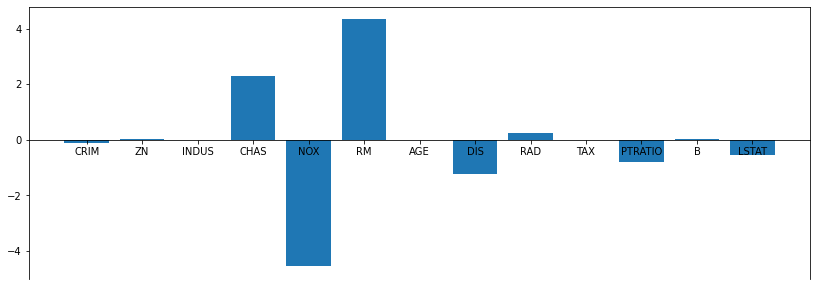

In [344]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(ridger_coeff["Feature_name"], ridger_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()

---

## 3. `Elastic Net ( Hybrid of both L1 & L2 )----------------------------------`
[Click Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [345]:
from sklearn.linear_model import ElasticNet

In [346]:
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)

ElasticNet(alpha=1)

In [347]:
# calculate the prediction 
y_pred_elastic = e_net.predict(X_test)
y_pred_elastic

array([28.73804538, 32.61547243, 13.24786727, 25.69503115, 19.0982112 ,
       21.89099215, 18.08554639, 11.67512929, 22.16140012, 21.20744127,
       21.58739223, 20.31098427, -5.4842661 , 20.72281007, 21.99443734,
       23.72595045, 20.51791539,  6.60111066, 36.95207211, 18.1784402 ,
       27.84966354, 29.37608795, 12.09035491, 24.23257555, 19.41447234,
       16.73485506, 23.07880091, 13.40782452, 19.43808794, 20.70523912,
       23.46033306, 26.26206441, 22.74376672, 23.91527106, 14.9307228 ,
       21.62891041, 30.55587257, 23.44379007, 20.72800132, 24.12094155,
       14.8295922 , 31.18338549, 38.22556159, 19.00100762, 26.97528721,
       18.86342494, 15.71387281, 25.05523239, 19.35023458, 31.362351  ,
       23.6586047 , 33.33069912, 16.19630886, 25.47634136, 37.6179301 ,
       22.81313977, 19.98546835, 32.38903769, 24.9537761 , 15.33246868,
       23.89484992, 30.89460741, 31.42315611, 18.9957973 , 23.97825826,
       14.30962487, 19.68172617, 26.74274689, 31.15933043, 12.70

In [348]:
from sklearn.metrics import r2_score, mean_squared_error

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred_elastic))
Rsqr_test = round(r2_score(y_test,y_pred_elastic)*100,2)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.9085071538372596
RSquared is: 65.59%


In [349]:
elastic_coeff = pd.DataFrame(e_net.coef_,columns=["coeff"])
elastic_coeff["Feature_name"] = X.columns
elastic_coeff

,coeff,Feature_name
0,-0.102709,CRIM
1,0.034142,ZN
2,-0.006891,INDUS
3,0.000000,CHAS
4,-0.000000,NOX
5,1.144283,RM
6,0.014428,AGE
7,-0.709302,DIS
8,0.264725,RAD
9,-0.013472,TAX


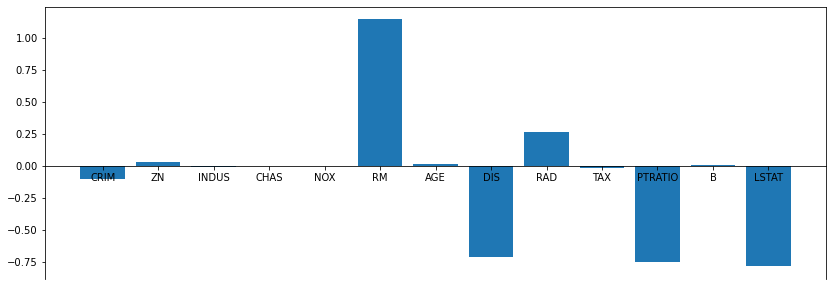

In [350]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(elastic_coeff["Feature_name"], elastic_coeff["coeff"])
ax.spines['bottom'].set_position('zero')
plt.show()

## `End -------------------------`